Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library(tidymodels)

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 1, 3, 1, 13, 5, 5, 3, 10, 4, 11,…
$ Glucose                  <dbl> 85, 89, 116, 115, 103, 126, 97, 145, 117, 109…
$ BloodPressure            <dbl> 66, 66, 74, 0, 30, 88, 66, 82, 92, 75, 58, 78…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 41, 15, 19, 0, 26, 11, 31, …
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 235, 140, 110, 0, 0, 54, 0, …
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 43.3, 39.3, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.183, 0.704, 0.4…
$ Age                      <dbl> 31, 21, 30, 29, 33, 27, 22, 57, 38, 60, 22, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The variable Outcome since it is a categorical variable.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

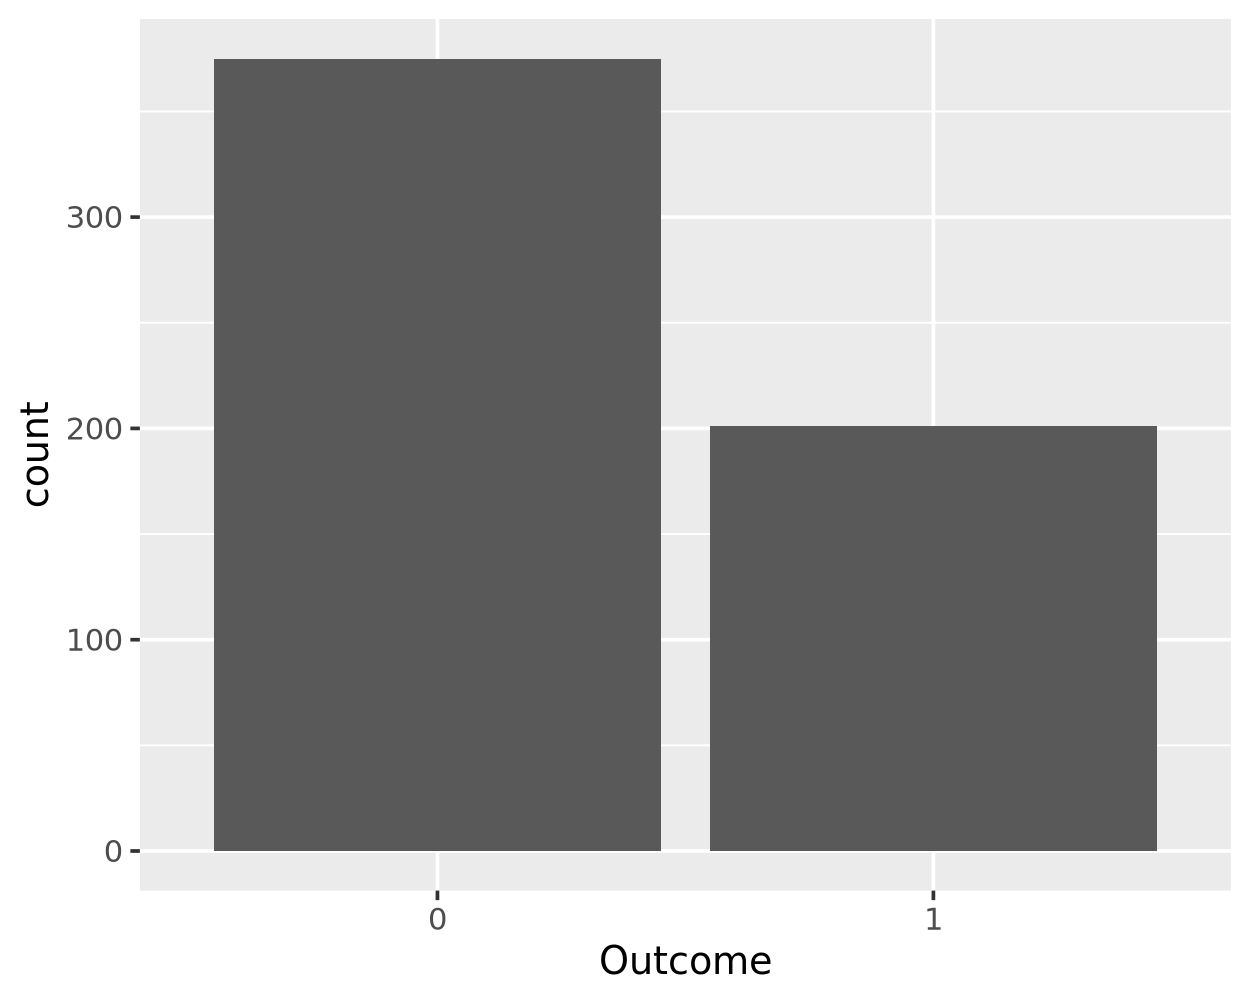

In [5]:
diabetes_train |>
    ggplot(aes(x = Outcome)) +
    geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, we don't. The 0 Outcome, or No, has approximately 375 observations, and the 1 oucome, Yes, has 200.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

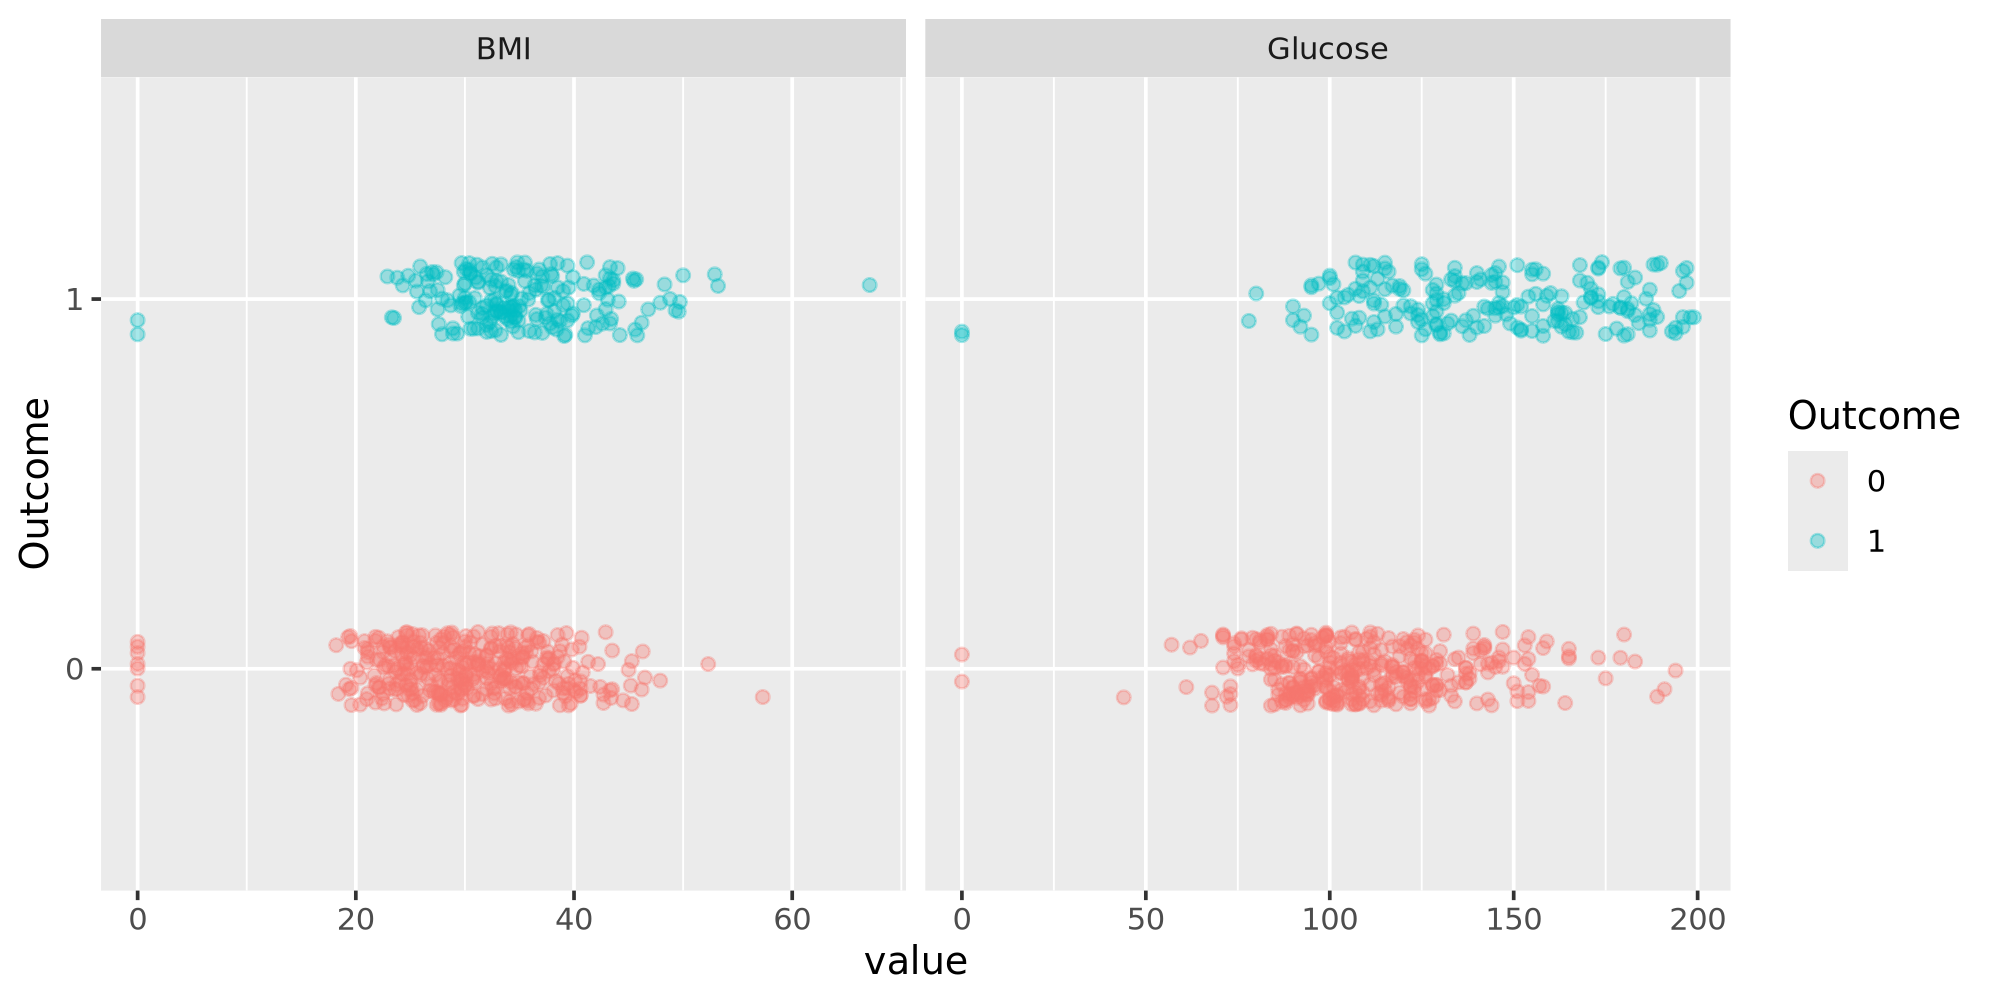

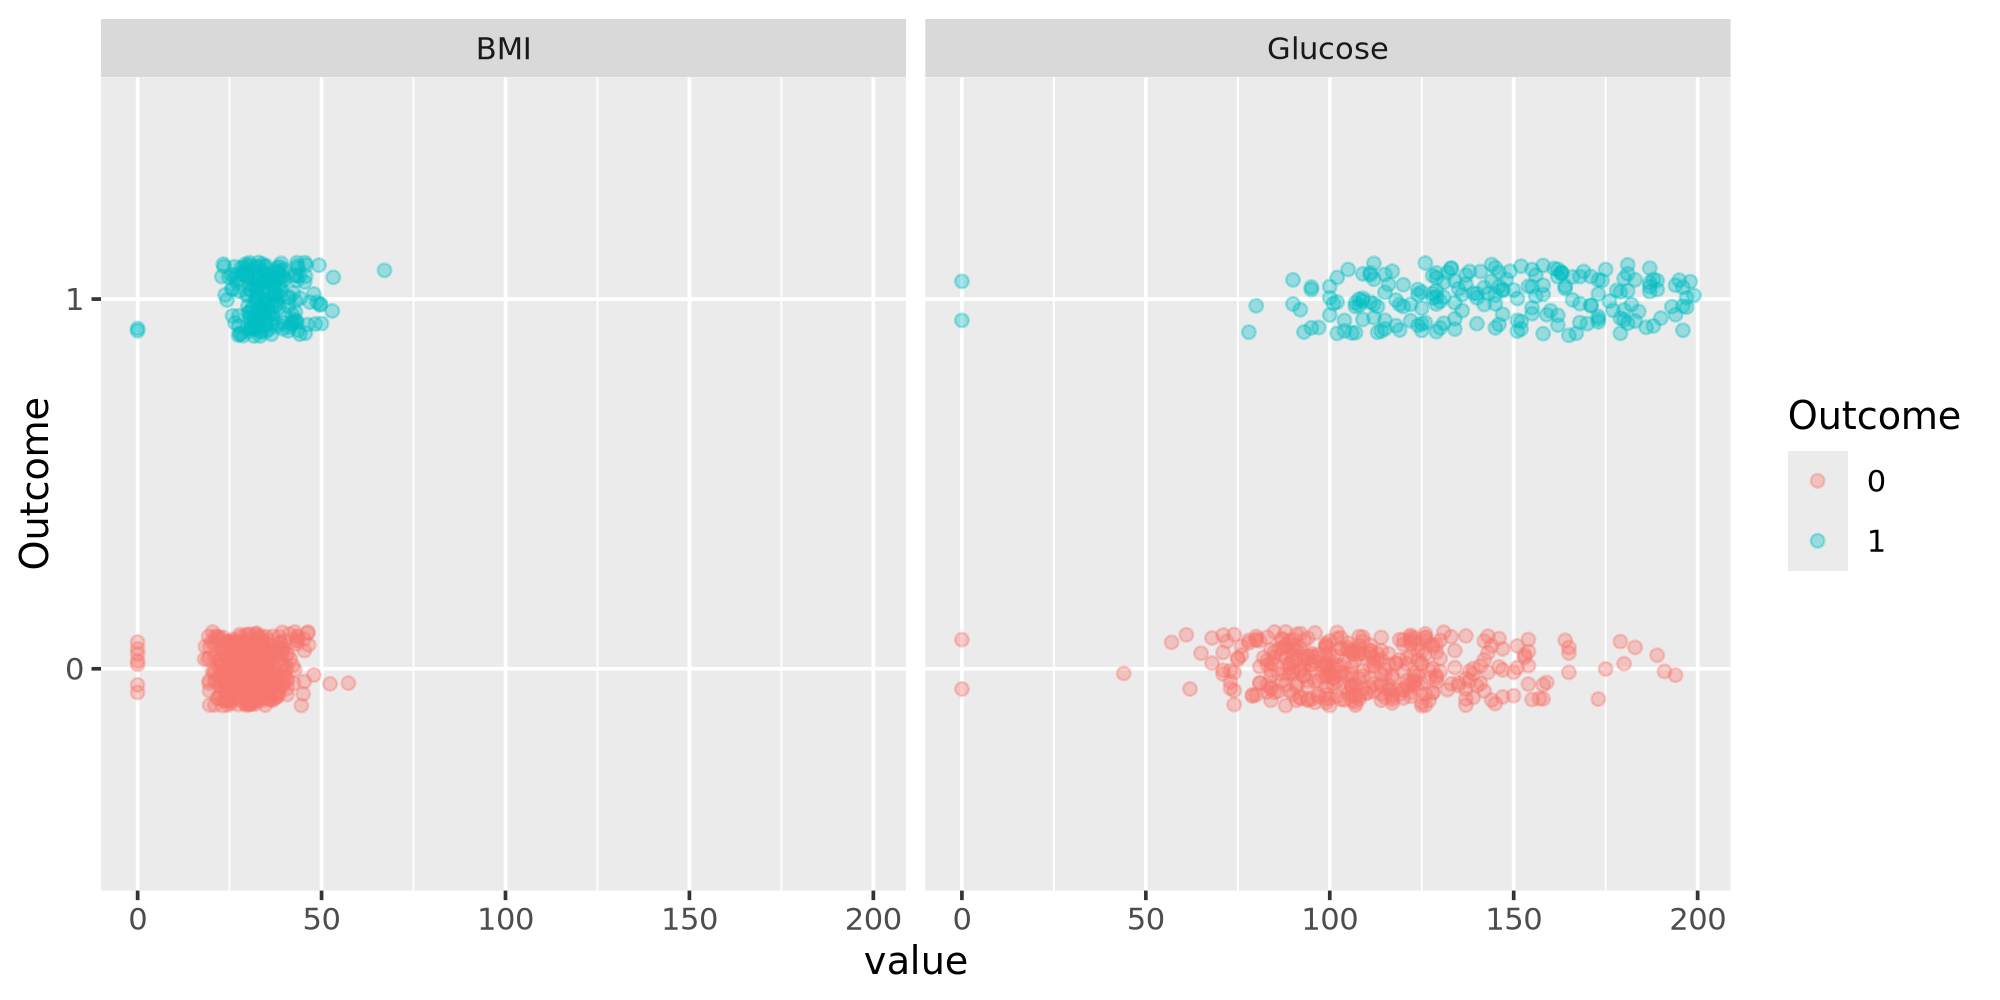

In [16]:
options(repr.plot.height = 4, repr.plot.width = 8)

plot_df |>
    ggplot(aes(x = value, y = Outcome, color = Outcome)) +
    geom_point(alpha = 0.35, position = position_jitter(height = 0.1, width = 0)) +
    facet_wrap(~name, ncol = 2, scales = 'free_x') 

plot_df |>
    ggplot(aes(x = value, y = Outcome, color = Outcome)) +
    geom_point(alpha = 0.35, position = position_jitter(height = 0.1, width = 0)) +
    facet_wrap(~name, ncol = 2) 

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

It zooms out the X axis, and the X scale will be the same in both plots of the facet.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [20]:
rec = recipe(Outcome ~ BMI + Glucose, data = diabetes_train)

mod = logistic_reg() |> set_engine('glm')

wf = workflow() |>
  add_recipe(rec) |>
  add_model(mod)

fit = fit(wf, diabetes_train)

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [21]:
diabetes_test_wPred = augment(fit, diabetes_test)

diabetes_test_wPred

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.4310519,0.56894812,6,148,72,35,0,33.6,0.627,50,1
1,0.1363042,0.86369577,2,197,70,45,543,30.5,0.158,53,1
0,0.6944965,0.30550352,4,110,92,0,0,37.6,0.191,30,0
0,0.6300529,0.36994715,10,139,80,0,0,27.1,1.441,57,0
1,0.1789738,0.82102617,1,189,60,23,846,30.1,0.398,59,1
0,0.8001410,0.19985902,8,99,84,0,0,35.4,0.388,50,0
0,0.7550824,0.24491764,9,119,80,35,0,29.0,0.263,29,1
1,0.4217506,0.57824942,11,143,94,33,146,36.6,0.254,51,1
0,0.9420342,0.05796577,6,92,92,0,0,19.9,0.188,28,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [22]:
diabetes_test_wPred = augment(fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 111  37
         1  14  30

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**